In [1]:
import re
from getpass import getpass
from datetime import datetime

import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
DATA_IP = getpass()

········


In [3]:
!scp $DATA_IP:~/co2.log .
!head co2.log

co2.log                                       100%  160KB 159.9KB/s   00:00    
dt:2019-08-16 14:41:04.232050
 H 00636 T 01249 Z 01462 z 01490
 H 00636 T 01249 Z 01458 z 01417
 H 00636 T 01249 Z 01451 z 01413
 H 00636 T 01249 Z 01454 z 01482
 H 00636 T 01249 Z 01462 z 01545
dt:2019-08-16 14:41:09.380772
dt:2019-08-16 14:42:09.441674
 H 00624 T 01249 Z 01469 z 01443
 H 00623 T 01249 Z 01471 z 01477


In [4]:
def parse_lines(datalines, startdt, enddt):
    dt = (enddt - startdt)/len(datalines)
    
    dts = []
    hs = []
    ts = []
    Zs = []
    zs = []
    currdt = startdt + dt/2
    for line in datalines:
        match = re.match(r' H (\d*) T (\d*) Z (\d*) z (\d*)\n', line)
        grps = match.groups()
        dts.append(currdt)
        hs.append(int(grps[0])/10)
        ts.append((int(grps[1])-1000)/10)
        Zs.append(float(grps[2]))
        zs.append(float(grps[3]))
        
        currdt = currdt + dt
    return dts, hs, ts, Zs, zs        

def parse_file(fn):
    with open(fn, 'r') as f:
        dts, hs, ts, Zs, zs = (list() for _ in range(5))

        startdt = enddt = None
        datalines = []

        for line in f:
            if line.startswith('dt:'):
                if startdt is None:
                    startdt = datetime.strptime(line[3:-1], '%Y-%m-%d %H:%M:%S.%f')
                else:
                    enddt = datetime.strptime(line[3:-1], '%Y-%m-%d %H:%M:%S.%f')
                    dti, hi, ti, Zi, zi = parse_lines(datalines, startdt, enddt)
                    dts.append(dti)
                    hs.append(hi)
                    ts.append(ti)
                    Zs.append(Zi)
                    zs.append(zi)
                    startdt = enddt = None
                    datalines = []
            else:
                datalines.append(line)

    dts = np.array(np.concatenate(dts), dtype='datetime64')
    hs = np.concatenate(hs)
    ts = np.concatenate(ts)
    Zs = np.concatenate(Zs)
    zs = np.concatenate(zs)
    
    return {'datetime':dts, 'humidity': hs, 'temperature': ts, 'co2_ppm_filtered':Zs, 'co2_ppm_raw':zs}

In [5]:
!scp $DATA_IP:~/co2.log .
co2_data = parse_file('co2.log')

co2.log                                       100%  160KB 159.9KB/s   00:00    


In [6]:
df = pd.DataFrame(co2_data)
df

,datetime,humidity,temperature,co2_ppm_filtered,co2_ppm_raw
0,2019-08-16 14:41:04.746922,63.6,24.9,1462.0,1490.0
1,2019-08-16 14:41:05.776666,63.6,24.9,1458.0,1417.0
2,2019-08-16 14:41:06.806410,63.6,24.9,1451.0,1413.0
3,2019-08-16 14:41:07.836154,63.6,24.9,1454.0,1482.0
4,2019-08-16 14:41:08.865898,63.6,24.9,1462.0,1545.0
5,2019-08-16 14:42:09.956560,62.4,24.9,1469.0,1443.0
6,2019-08-16 14:42:10.986331,62.3,24.9,1471.0,1477.0
7,2019-08-16 14:42:12.016102,62.3,24.9,1475.0,1499.0
8,2019-08-16 14:42:13.045873,62.3,24.9,1471.0,1454.0
9,2019-08-16 14:42:14.075644,62.2,24.9,1471.0,1451.0


"Danger" boundaries for CO2 data are from https://dash.harvard.edu/bitstream/handle/1/27662232/4892924.pdf

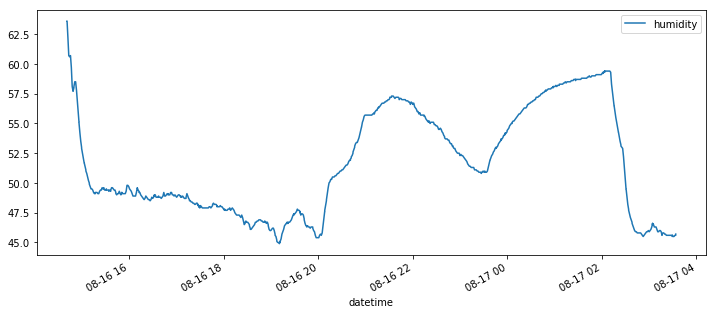

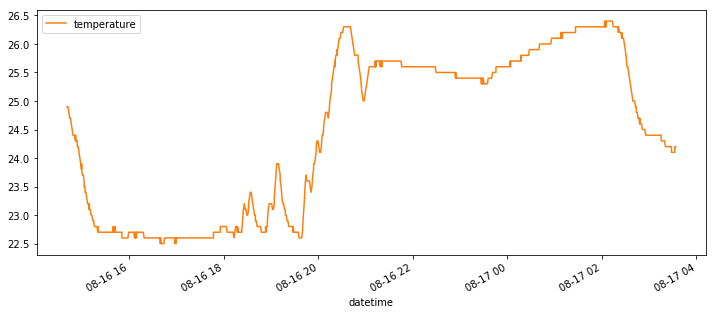

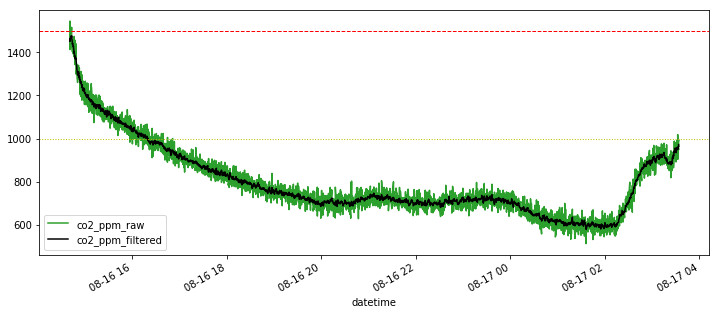

In [7]:
ccycle = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
df.plot('datetime', 'humidity', figsize=(12, 5), color=next(ccycle))
df.plot('datetime', 'temperature', figsize=(12, 5), color=next(ccycle))

ax = df.plot('datetime', 'co2_ppm_raw', figsize=(12, 5), color=next(ccycle))
df.plot('datetime', 'co2_ppm_filtered', ax=ax, color='k')
ax.axhline(1000, c='y', ls=':', lw=1)
ax.axhline(1500, c='r', ls='--', lw=1)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

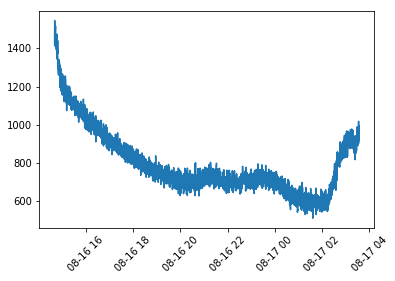

In [12]:
plt.plot(co2_data['datetime'], co2_data['co2_ppm_raw'])
plt.setp(plt.xticks()[1], rotation=45)